In [1]:
#!pip install keras

In [2]:
#!pip install tensorflow==2.2

In [3]:
# Chapter1
# NN構築試行
%matplotlib inline
import numpy as np
import pandas as pd
#import tensorflow as tf

import lightgbm as lgb
import optuna

from optuna.samplers import RandomSampler  # 最適化に用いる乱数を指定するためのメソッド
from sklearn.model_selection import cross_val_score  # k-分割交差検証を行うためのモジュール

import matplotlib.pyplot as plt


from sklearn import metrics
from functools import partial

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import pandas as pd  # データの加工用のパッケージ
from sklearn.model_selection import train_test_split  # データを分割するための関数
from sklearn.model_selection import GridSearchCV  # グリッドサーチを行うためのクラス
from sklearn.svm import SVC  # サポートベクトルマシンを用いるためのクラス


ModuleNotFoundError: No module named 'lightgbm'

In [63]:
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 100)

# 学習データ読み込み
data_X = pd.read_csv("train-airbnb.csv")
#data = data_X.dropna(how="any")
data = data_X
data.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,f,2016-07-27,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [64]:
# インプットデータ（欠損値処理前）
print('インプットデータ（欠損値処理前）')
print(data.shape)
print(data.dtypes)
print(data.isnull().sum())

# 欠損値処理
# あとで調整したほうが良いかも。
data = data.dropna()
print('欠損値処理後', data.shape)
print(data.isnull().sum())

# objectの確認
print("amenities")
print(data['amenities'].unique())
print('')
print("bed_type")
print(data['bed_type'].unique())
print('')
print("cancellation_policy")
print(data['cancellation_policy'].unique())
print('')
print("city")
print(data['city'].unique())
print('')
print("cleaning_fee")
print(data['cleaning_fee'].unique())
print('')
print("description")
print(data['description'].unique())
print('')
print("first_review")
print(data['first_review'].unique())
print('')
print("host_has_profile_pic")
print(data['host_has_profile_pic'].unique())
print('')
print("host_identity_verified")
print(data['host_identity_verified'].unique())
print('')
print("host_response_rate")
print(data['host_response_rate'].unique())
print('')
print("host_since")
print(data['host_since'].unique())
print('')
print("instant_bookable")
print(data['instant_bookable'].unique())
print('')
print("last_review")
print(data['last_review'].unique())
print('')
print("name")
print(data['name'].unique())
print('')
print("neighbourhood")
print(data['neighbourhood'].unique())
print('')
print("property_type")
print(data['property_type'].unique())
print('')
print("room_type")
print(data['room_type'].unique())
print('')
print("thumbnail_url")
print(data['thumbnail_url'].unique())
print('')
print("zipcode")
print(data['zipcode'].unique())
print('')

インプットデータ（欠損値処理前）
(55583, 29)
id                          int64
accommodates                int64
amenities                  object
bathrooms                 float64
bed_type                   object
bedrooms                  float64
beds                      float64
cancellation_policy        object
city                       object
cleaning_fee               object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
property_type              object
review_scores_rating      float64
room_type                  object
thumbnail_url              object
zipcode                    object
y                  

 'You’ll love my place because of the ambiance and relaxing atmosphere. Feel free to use the pools, mini-fridge/microwave in room, utensils, washer/dryer, wifi, etc. for your convenience while traveling. My place is good for solo adventurers. This is a 2 storey townhouse. Private room is upstairs furnished with a full size bed (suitable for 1 person), desk, closet, hardwood floor, TV, mini-fridge, microwave, Keurig coffee maker. Bath is shared. Coin-operated washing machine and dryer are in our garage. We believe that if you want to explore L.A. you need (to rent) a car. L.A. is a car city. All major attractions are accessible from our area; you just need your cell phone map or GPS. Other options are Uber, Lyft, and a Metro bus station 5 mins away.']

first_review
['2016-09-12' '2015-08-05' '2017-02-10' ... '2012-05-12' '2011-05-08'
 '2011-09-21']

host_has_profile_pic
['t' 'f']

host_identity_verified
['t' 'f']

host_response_rate
['100%' '90%' '80%' '0%' '60%' '96%' '95%' '50%' '40%'

 '2014-08-31' '2016-02-19']

name
['Guest Bedroom in Brookland' 'Charming 1-bedroom - UWS Manhattan'
 'Close NYU Langone H, Room A/3min to Subway' ...
 'Cozy 1bd/1bath bdrm w/stunning city views!'
 'Super Swanky New York Apartment!'
 'Private Room in Resort-Style Townhouse']

neighbourhood
['Brookland' 'Upper West Side' 'Sunset Park' 'Bedford-Stuyvesant'
 'North Beach' 'Jackson Heights' 'Harlem' 'Silver Lake'
 'Columbia Street Waterfront' 'Williamsburg' 'East Hollywood' 'Lakeview'
 'Palms' 'Duboce Triangle' 'Garfield Park' 'Echo Park' 'Long Beach'
 'Downey' 'Mar Vista' 'Mission District' 'Marina Del Rey' 'Topanga'
 'North Hollywood' 'Western Addition/NOPA' 'Noe Valley' 'Crown Heights'
 'Ridgewood' 'Westlake' 'Columbia Heights' 'Boerum Hill'
 'Presidio Heights' 'Clinton Hill' 'Prospect Heights' 'Jamaica'
 'Lefferts Garden' 'South Boston' 'Chinatown' 'Bernal Heights'
 'Hollywood Hills' 'Financial District' 'Elmhurst' 'Kingsbridge Heights'
 'East New York' 'Rego Park' 'East Flatbush' 'The

 'New Springville' 'Skyland' 'Chatham' 'Queens' 'St. Elizabeths']

property_type
['House' 'Apartment' 'Loft' 'Cabin' 'Condominium' 'Guest suite'
 'Townhouse' 'Other' 'Guesthouse' 'Villa' 'Dorm' 'Bed & Breakfast'
 'Timeshare' 'Bungalow' 'Cave' 'Hostel' 'In-law' 'Serviced apartment'
 'Boat' 'Tent' 'Castle' 'Camper/RV' 'Earth House' 'Treehouse' 'Hut'
 'Boutique hotel' 'Vacation home' 'Chalet' 'Yurt' 'Tipi' 'Train']

room_type
['Private room' 'Entire home/apt' 'Shared room']

thumbnail_url
['https://a0.muscache.com/im/pictures/e4d8b51f-623c-4b5d-8186-f4f855d66cf2.jpg?aki_policy=small'
 'https://a0.muscache.com/im/pictures/92879730/5027d0c4_original.jpg?aki_policy=small'
 'https://a0.muscache.com/im/pictures/dd071463-3288-4443-9ce1-52b7bf7dc525.jpg?aki_policy=small'
 ...
 'https://a0.muscache.com/im/pictures/da9afcbd-cb4d-4d15-8b39-e9adf4654d8c.jpg?aki_policy=small'
 'https://a0.muscache.com/im/pictures/12634916/58465e1e_original.jpg?aki_policy=small'
 'https://a0.muscache.com/im/pictures/6

In [65]:
#temp_data = input_data_X.drop(["id","amenities",  "description", "first_review", "host_response_rate", "host_since", "last_review", "name", "neighbourhood", "thumbnail_url", "zipcode"], axis = 1).replace({"cleaning_fee": {"t":0, "f":1}, "host_has_profile_pic": {"t":0, "f":1}, "host_identity_verified": {"t":0, "f":1}, "instant_bookable": {"t":0, "f":1}})
data_temp = data.drop(columns=['amenities', 'description', 'thumbnail_url', 'first_review', 'last_review', 'name', 'zipcode', 'neighbourhood'])
data_temp.head()

,id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,number_of_reviews,property_type,review_scores_rating,room_type,y
1,1,2,1.0,Real Bed,1.0,1.0,strict,DC,t,t,t,100%,2015-12-30,f,38.934810,-76.978190,9,House,100.0,Private room,42.0
4,4,2,1.0,Real Bed,1.0,1.0,strict,NYC,t,t,t,100%,2015-03-25,f,40.785050,-73.974691,5,Apartment,100.0,Entire home/apt,165.0
5,5,2,1.0,Real Bed,1.0,1.0,flexible,NYC,t,t,t,100%,2016-11-29,f,40.640241,-74.015729,7,House,94.0,Private room,55.0
6,6,2,1.5,Real Bed,1.0,1.0,moderate,NYC,t,t,t,100%,2014-05-29,t,40.676824,-73.915965,65,House,91.0,Private room,48.0
8,8,2,1.0,Real Bed,1.0,1.0,strict,SF,t,t,f,100%,2016-07-09,f,37.801514,-122.411410,21,Apartment,87.0,Private room,95.0


In [91]:
print(data_temp.dtypes)
df = data_temp

# dummy変数化
# bed_typeのダミー変数化
dat_bed_type = pd.get_dummies(df["bed_type"]).astype(float)
df = pd.concat([df, dat_bed_type], axis=1)
df = df.drop('bed_type', axis=1)

# cancellation_policyのダミー変数化
#dat_cancellation_policy = pd.get_dummies(df["cancellation_policy"]).astype(float)
#df = pd.concat([df, dat_cancellation_policy], axis=1)
df = df.drop('cancellation_policy', axis=1)

# city  のダミー変数化
dat_city = pd.get_dummies(df["city"]).astype(float)
df = pd.concat([df, dat_city], axis=1)
df = df.drop('city', axis=1)

# cleaning_feeのダミー変数化
# dat_cleaning_fee = pd.get_dummies(df["cleaning_fee"]).astype(int)
# df = pd.concat([df, dat_cleaning_fee], axis=1)
df = df.drop('cleaning_fee', axis=1)

# host_has_profile_picのダミー変数化
# dat_host_has_profile_pic = pd.get_dummies(df["host_has_profile_pic"]).astype(int)
# df = pd.concat([df, dat_host_has_profile_pic], axis=1)
df = df.drop('host_has_profile_pic', axis=1)

# host_identity_verifiedのダミー変数化
# dat_host_identity_verified = pd.get_dummies(df["host_identity_verified"]).astype(int)
# df = pd.concat([df, dat_host_identity_verified], axis=1)
df = df.drop('host_identity_verified', axis=1)

# host_response_rateのダミー変数化
# dat_host_response_rate = pd.get_dummies(df["host_response_rate"]).astype(int)
# df = pd.concat([df, dat_host_response_rate], axis=1)
df = df.drop('host_response_rate', axis=1)

# host_since  のダミー変数化
# dat_host_since = pd.get_dummies(df["host_since"]).astype(int)
# df = pd.concat([df, dat_host_since], axis=1)
df = df.drop('host_since', axis=1)

# instant_bookableのダミー変数化
# dat_instant_bookable = pd.get_dummies(df["instant_bookable"]).astype(int)
# df = pd.concat([df, dat_instant_bookable], axis=1)
df = df.drop('instant_bookable', axis=1)

# property_typeのダミー変数化
# dat_property_type = pd.get_dummies(df["property_type"]).astype(int)
# df = pd.concat([df, dat_property_type], axis=1)
df = df.drop('property_type', axis=1)

# room_typeのダミー変数化
dat_room_type = pd.get_dummies(df["room_type"]).astype(float)
df = pd.concat([df, dat_room_type], axis=1)
df = df.drop('room_type', axis=1)

df.head()

id                          int64
accommodates                int64
bathrooms                 float64
bed_type                   object
bedrooms                  float64
beds                      float64
cancellation_policy        object
city                       object
cleaning_fee               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
latitude                  float64
longitude                 float64
number_of_reviews           int64
property_type              object
review_scores_rating      float64
room_type                  object
y                         float64
dtype: object


,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Boston,Chicago,DC,LA,NYC,SF,Entire home/apt,Private room,Shared room
1,1,2,1.0,1.0,1.0,38.934810,-76.978190,9,100.0,42.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,2,1.0,1.0,1.0,40.785050,-73.974691,5,100.0,165.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,5,2,1.0,1.0,1.0,40.640241,-74.015729,7,94.0,55.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,6,2,1.5,1.0,1.0,40.676824,-73.915965,65,91.0,48.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,8,2,1.0,1.0,1.0,37.801514,-122.411410,21,87.0,95.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [92]:
df=df.astype(float)
print(df.dtypes)

id                      float64
accommodates            float64
bathrooms               float64
bedrooms                float64
beds                    float64
latitude                float64
longitude               float64
number_of_reviews       float64
review_scores_rating    float64
y                       float64
Airbed                  float64
Couch                   float64
Futon                   float64
Pull-out Sofa           float64
Real Bed                float64
Boston                  float64
Chicago                 float64
DC                      float64
LA                      float64
NYC                     float64
SF                      float64
Entire home/apt         float64
Private room            float64
Shared room             float64
dtype: object


In [93]:
X = df.drop('id', axis =1)
X = X.drop('y', axis =1)
y = df['y']

In [94]:
X.head()

,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Boston,Chicago,DC,LA,NYC,SF,Entire home/apt,Private room,Shared room
1,2.0,1.0,1.0,1.0,38.934810,-76.978190,9.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,1.0,1.0,1.0,40.785050,-73.974691,5.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,2.0,1.0,1.0,1.0,40.640241,-74.015729,7.0,94.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,2.0,1.5,1.0,1.0,40.676824,-73.915965,65.0,91.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,2.0,1.0,1.0,1.0,37.801514,-122.411410,21.0,87.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [95]:
X.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude',
       'longitude', 'number_of_reviews', 'review_scores_rating', 'Airbed',
       'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Boston', 'Chicago',
       'DC', 'LA', 'NYC', 'SF', 'Entire home/apt', 'Private room',
       'Shared room'],
      dtype='object')

In [96]:
list(X.columns)
print(y.head())

1     42.0
4    165.0
5     55.0
6     48.0
8     95.0
Name: y, dtype: float64


In [97]:
def objective(X, y, trial):
    # train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
    
    '''ハイパーパラメータをチューニングする'''    
    bootstrap=True
    ccp_alpha=trial.suggest_uniform('ccp_alpha', 0., 0.9)
    criterion='mse'
    max_depth=trial.suggest_int('max_depth', 7, 12)
    max_features='auto'
    max_leaf_nodes=None
    max_samples=None
    min_impurity_decrease=0.0
    min_impurity_split=None
    min_samples_leaf=1
    min_samples_split=2
    min_weight_fraction_leaf=0.0
    n_estimators=trial.suggest_int('n_estimators', 100, 2000)
    n_jobs=-1
    oob_score=False
    random_state=0
    verbose=0
    warm_start=False

    # 学習
    params = dict(bootstrap=True, 
                  n_estimators=n_estimators, 
                  criterion='mse', 
                  ccp_alpha=ccp_alpha,
                  max_depth=max_depth, 
                  random_state=0, 
                  n_jobs=-1)

    model = RandomForestRegressor(**params)
    model.fit(X_train,y_train)
    
    #検証データにするべきであるが、一旦テストデータで進行
    y_test_pred  = model.predict(X_test)

    diff_value = abs(y_test - y_test_pred)
    # 精度の計算
    scores = (diff_value / y_test).mean() # Scoresを最小化するのが目的なので、direction="maximize"になる
    
    return 1.0 - scores

In [98]:
# 目的関数にデータを適用する
f = partial(objective, X, y)

# 最適化のセッションを作る
#study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=2))
study = optuna.create_study(direction='maximize', sampler=RandomSampler(seed=40))

# 50 回試行する
study.optimize(f, n_trials=3)
# 最適化したパラメータを出力する
print('params:', study.best_params)

[I 2020-10-25 19:09:18,729] Trial 0 finished with value: 0.6934588508651989 and parameters: {'ccp_alpha': 0.36691832527225754, 'max_depth': 12, 'n_estimators': 1116}. Best is trial 0 with value: 0.6934588508651989.
[I 2020-10-25 19:09:35,088] Trial 1 finished with value: 0.6752402745482788 and parameters: {'ccp_alpha': 0.6345272716773649, 'max_depth': 8, 'n_estimators': 1392}. Best is trial 0 with value: 0.6934588508651989.
[I 2020-10-25 19:10:00,346] Trial 2 finished with value: 0.6873937938974342 and parameters: {'ccp_alpha': 0.5275921916478952, 'max_depth': 10, 'n_estimators': 1795}. Best is trial 0 with value: 0.6934588508651989.


params: {'ccp_alpha': 0.36691832527225754, 'max_depth': 12, 'n_estimators': 1116}


In [99]:
# 試行の結果に合わせ、最適なパラメータの学習器(lgb_best)を作成
rfr_best = RandomForestRegressor(**study.best_params)

# ベストモデルの作成
rfr_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.36691832527225754,
                      criterion='mse', max_depth=12, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1116,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [100]:
y_train_pred = rfr_best.predict(X_train)
y_test_pred  = rfr_best.predict(X_test)

diff_value = abs(y_test - y_test_pred)

Percentage average of difference from correct answer:  0.30648878436512444
Minimum difference from correct answer:  0.0019502695773496725
Maximum difference from correct answer:  1251.5198683674262
MSE train: 1892.82, test: 5943.20
[5.47254547e-02 1.95516787e-01 3.01578519e-01 1.63685691e-02
 1.09459423e-01 1.47562353e-01 4.36875415e-02 3.39148772e-02
 1.57368842e-04 2.28431127e-04 1.13900679e-04 9.82113420e-05
 3.41161179e-04 1.05545147e-04 1.18402199e-03 2.21019477e-03
 1.27940206e-03 6.52550392e-03 8.80782272e-04 7.84578087e-02
 4.46497718e-03 1.13916582e-03]


<Figure size 576x288 with 0 Axes>

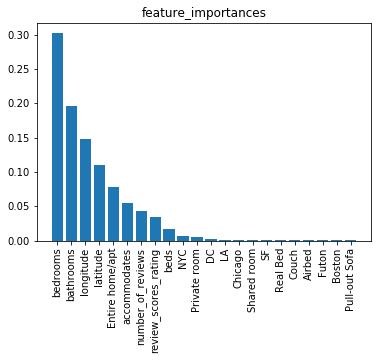

In [101]:
print('Percentage average of difference from correct answer: ', (diff_value / y_test).mean())
print('Minimum difference from correct answer: ', min(diff_value))
print('Maximum difference from correct answer: ', max(diff_value))

print('MSE train: %.2f, test: %.2f' % (mean_squared_error(y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred)))


print(rfr_best.feature_importances_)

importances = rfr_best.feature_importances_
indices = np.argsort(importances)[::-1]
names = list(X.columns)
names = [names[i] for i in indices]


plt.figure(figsize=(8,4))
plt.figure()
plt.title("feature_importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)

plt.show()

In [ ]:
X.columns

In [ ]:
metrics.SCORERS.keys()

In [ ]:
# #optuna

# f = partial(objective, X_train, y_train)
# # 最適化のセッションを作る
# #study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=2))
# study = optuna.create_study(sampler=RandomSampler(seed=40))

# # 50 回試行する
# study.optimize(f, n_trials=3)
# #study.optimize(objective, n_trials=3)

# # 最適化したパラメータを出力する
# print('params:', study.best_params)


# # study = optuna.create_study() # direction="maximize"
# # study.optimize(objective, n_trials=3)
# # print(study.best_trial)
# # print(study.best_value)
# # print(study.best_params)
# # output_param = study.best_params

# #print(study.best_params['loss_func'])
# #print(study.best_params['learning_rate'])

In [ ]:
# # 試行の結果に合わせ、最適なパラメータの学習器(lgb_best)を作成
# lgb_best = lgb.LGBMRegressor(**study.best_params)

# # ベストモデルの作成
# lgb_best.fit(X_train, y_train)

In [ ]:
# # 各指標の算出
# y_verification_predict = lgb_best.predict(X_train)
# print('学習データの正解率:',lgb_best.score(X_train,y_train))
# print('学習データのF-値:',f1_score(y_train, y_verification_predict))
# print('')
# y_verification_predict = lgb_best.predict(X_test)
# print('テストデータの正解率:',lgb_best.score(X_test,y_test))
# print('テストデータのF-値:',f1_score(y_test, y_verification_predict))
# # print('正解率', accuracy_score(y_test, y_pred))
# # print('検出率', recall_score(y_test, y_pred))
# # print('適合率', precision_score(y_test, y_pred))
# # print('F-値', f1_score(y_test, y_pred))

In [ ]:
# # Chapter2
# 学習の再現を行うために乱数シードを固定するためのコード
# import os
# import random as rn
# from tensorflow.compat.v1.keras import backend as K

# os.environ['PYTHONHASHSEED'] = '0'
# np.random.seed(0)
# rn.seed(0)

# tf.compat.v1.set_random_seed(0)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph())
# K.set_session(sess)

In [ ]:
# # Chapter3
# # データ前処理
# def pre_process(input_data_X: pd.DataFrame):
#     # temp_data = input_data_X.drop(["id","amenities", "bed_type", "cancellation_policy", "city", "description", "first_review", "host_response_rate", "host_since"
#     #                             , "last_review", "name", "neighbourhood", "property_type", "room_type", "thumbnail_url", "zipcode"], axis = 1).replace({"cleaning_fee": {"t":0, "f":1}, "host_has_profile_pic": {"t":0, "f":1}, "host_identity_verified": {"t":0, "f":1}, "instant_bookable": {"t":0, "f":1}})
    
#     temp_data = input_data_X.drop(["id","amenities",  "description", "first_review", "host_response_rate", "host_since", "last_review", "name", "neighbourhood", "thumbnail_url", "zipcode"], axis = 1).replace({"cleaning_fee": {"t":0, "f":1}, "host_has_profile_pic": {"t":0, "f":1}, "host_identity_verified": {"t":0, "f":1}, "instant_bookable": {"t":0, "f":1}})
#     temp_data = pd.get_dummies(temp_data)
#     temp_data = temp_data.drop(["property_type_Earth House","property_type_Lighthouse","property_type_Tipi","property_type_Train","property_type_Treehouse","property_type_Vacation home"], axis=1, errors="ignore")


#     processed_X = ((temp_data - temp_data.min()) / (temp_data.max() - temp_data.min()))
#     # (x - train_stats['mean']) / train_stats['std']
#     return processed_X
# # train_dataset = data.sample(frac=0.8,random_state=0)
# # test_dataset = data.drop(train_dataset.index)
# train_dataset = data
# test_dataset = data

# train_y = train_dataset["y"]
# test_y = test_dataset["y"]
# train_X = pre_process(train_dataset.drop(["y"], axis=1))
# # test_X = pre_process(test_dataset.drop(["y"], axis=1))


In [ ]:
# train_stats = train_dataset.describe()
# train_stats.pop("y")
# train_stats = train_stats.transpose()

# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_X)
# normed_test_data = norm(test_X)

In [ ]:
# test_X.dtypes

In [ ]:
# import pathlib

# import matplotlib.pyplot as plt
# import seaborn as sns
# from tensorflow import keras
# from tensorflow.keras.layers import Dense, LSTM, Dropout
# from tensorflow.keras.metrics import binary_accuracy, Accuracy
# from tensorflow.keras.layers import SimpleRNN
# import optuna


In [ ]:
# hoge = train_dataset.drop(["id","amenities", "bed_type", "cancellation_policy", "city", "description", "first_review", "host_response_rate", "host_since"
#                                 , "last_review", "name", "neighbourhood", "property_type", "room_type", "thumbnail_url", "zipcode"], axis = 1).replace({"cleaning_fee": {"t":0, "f":1}, "host_has_profile_pic": {"t":0, "f":1}, "host_identity_verified": {"t":0, "f":1}, "instant_bookable": {"t":0, "f":1}})
# sns.pairplot(hoge[["y", "accommodates","host_identity_verified","instant_bookable", "number_of_reviews", "review_scores_rating"]], diag_kind="kde")

In [ ]:
# keras.backend.clear_session()
# # Keras以外を利用するのも一つの手段。
# model = keras.models.Sequential()
# model.add(Dense(units=64, activation=tf.nn.relu, input_shape=[len(train_X.keys())])) 
# # model.add(Dropout(0.5))
# model.add(Dense(units=64, activation=tf.nn.relu)) 
# # model.add(Dropout(0.5))
# model.add(Dense(units=1))
# model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
#         loss=keras.losses.mse,
#         metrics=["mae", "mse"])

In [ ]:
# history = model.fit(x = train_X,
#     y = train_y,
#     batch_size = 8192, # バッチサイズ
#     # epochs = 100, # エポック数
#     epochs = 700, # エポック数
#     validation_split = 0.1, # 検証データの割合
#     # callbacks = [es_cb], # 早期終了の設定
#     verbose = 1) # 進捗の確認を行うか（0:行わない, 1:行う）

In [ ]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.head()

In [ ]:
# hist.tail()

In [ ]:
# def plot_history(history):
#   hist = pd.DataFrame(history.history)
#   hist['epoch'] = history.epoch
  
#   plt.figure()
#   plt.xlabel('Epoch')
#   plt.ylabel('Mean Abs Error [y]')
#   plt.plot(hist['epoch'], hist['mae'],
#            label='Train Error')
#   plt.plot(hist['epoch'], hist['val_mae'],
#            label = 'Val Error')
#   plt.ylim([20,100])
#   plt.legend()
  
#   plt.figure()
#   plt.xlabel('Epoch')
#   plt.ylabel('Mean Square Error [$y^2$]')
#   plt.plot(hist['epoch'], hist['mse'],
#            label='Train Error')
#   plt.plot(hist['epoch'], hist['val_mse'],
#            label = 'Val Error')
#   plt.ylim([5000,20000])
#   plt.legend()
#   plt.show()


# plot_history(history)

In [ ]:
# # 重回帰
# # 説明変数の重みを確認
# from sklearn import linear_model  # 線形回帰を行うためのモジュール
# # 変数の準備
# # X = data_oh.drop(["loan_status_ChargedOff", "loan_status_FullyPaid"], axis=1)  # 説明変数の設定
# # y = data_oh["loan_status_FullyPaid"]  # 目的変数の設定

# # 学習
# lr = linear_model.LinearRegression()  # 線形回帰モデルのインスタンスを作成
# lr.fit(train_X, train_y)  # 回帰の実行

# # 結果の確認
# print("回帰係数:")
# print(pd.DataFrame({"Name": train_X.columns,
#                     "Coefficients": lr.coef_}).sort_values(by='Coefficients'))  # 回帰係数
# print("切片:", lr.intercept_)  # 切片
# print("決定係数:", lr.score(train_X, train_y))  # 決定係数

In [ ]:
# test_X.dtypes

In [ ]:
# pd.set_option('max_rows', 100)
# train_X.dtypes

In [ ]:
# data_X = pd.read_csv("test.csv")
# test_X = pre_process(data_X)
# y_proba = model.predict(test_X)
# y_proba

In [ ]:
# np.savetxt("C:\work\AI\workspace\\10.2_民博サービスの宿泊価格予測\\result.dat", y_proba.astype("float"), fmt="%0.10f",)

In [ ]:
# hoge = y_proba.astype("float")

In [ ]:
# np.savetxt("C:\work\AI\workspace\\10.2_民博サービスの宿泊価格予測\\hoge.dat", hoge)